In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [ ]:
df_diabetes['target'] = diabetes.target

In [ ]:
df_diabetes['target'] = np.where(df_diabetes['target'] > df_diabetes['target'].median(), 1, 0)


In [ ]:
X = df_diabetes.drop('target', axis=1)
y = df_diabetes['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model: {accuracy * 100:.2f}%")

Accuracy of KNN model: 68.54%


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[35 14]
 [14 26]]


In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        49
           1       0.65      0.65      0.65        40

    accuracy                           0.69        89
   macro avg       0.68      0.68      0.68        89
weighted avg       0.69      0.69      0.69        89



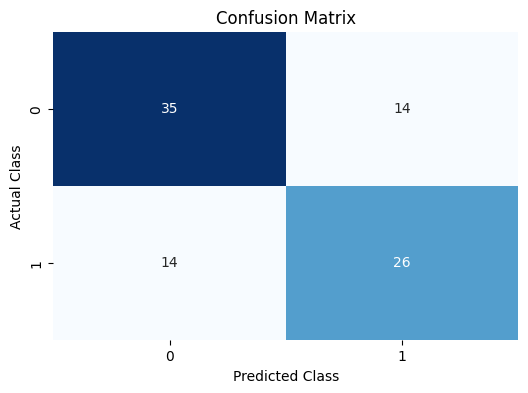

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()